In [38]:
import pandas as pd 
import numpy as np
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [51]:
df = pd.read_excel("house_price_Test.xlsx",index_col=0)

In [80]:
value_counts = df['Neighborhood'].value_counts()
neighborhood_counts = {}

for value, count in value_counts.items():
    neighborhood_counts[value] = count

In [82]:
value_counts = df['District'].value_counts()
district_counts = {}

for value, count in value_counts.items():
    district_counts[value] = count

In [83]:
district_counts

{'Çankaya': 5656,
 'Keçiören': 3762,
 'Mamak': 3323,
 'Etimesgut': 1877,
 'Yenimahalle': 1580,
 'Sincan': 1536,
 'Altındağ': 980,
 'Pursaklar': 681,
 'Gölbaşı': 282,
 'Polatlı': 261,
 'Çubuk': 58,
 'Akyurt': 20,
 'Elmadağ': 11,
 'Kızılcahamam': 9,
 'Kahramankazan': 8,
 'Beypazarı': 8,
 'Ayaş': 2,
 'Şereflikoçhisar': 2,
 'Haymana': 1,
 'Bala': 1,
 'Kalecik': 1,
 'Güdül': 1}

In [52]:
filtered_df = df[df["Neighborhood"] == "Etlik"]

filtered_df = filtered_df.drop(columns=['Neighborhood',"District"], axis=1)


X = filtered_df.iloc[:, :-1].values

In [53]:
X.shape

(513, 17)

In [54]:

Y = filtered_df["Price"].values/1000000

In [55]:
Y.shape

(513,)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
#Neighborhood_index = df.columns.get_loc('Neighborhood')
#District_index = df.columns.get_loc('District')
#encoder = ce.TargetEncoder(cols=[Neighborhood_index,District_index])
#encoder.fit(X_train, y_train)
#X_train_encoded = encoder.transform(X_train).values
#X_test_encoded = encoder.transform(X_test).values

In [58]:
X_train_norm = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_norm = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

In [69]:
xgb =  xg.XGBRegressor(objective ='reg:squarederror',
                                 learning_rate =0.05, # smaller learning rate
                                 n_estimators = 2000, # larger number of trees
                                 max_depth = 7, 
                                 subsample = 0.7, # fraction of samples used for each tree
                                 colsample_bytree = 0.5, # fraction of columns used for each tree
                            # early stopping after 50 rounds without improvement
                                 eval_metric = 'rmse', # evaluation metric
                                 verbose = True) # set to True to see training progress


In [ ]:
lr = LinearRegression()

In [79]:
xgb.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=False)


[21:09:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "verbose" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
lr.fit(X_train, y_train)

In [71]:

y_pred_train_xg = xgb.predict(X_train)
y_pred_test_xg = xgb.predict(X_test)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [72]:
#Mean Square Error Calculation
mse_train_xg = MSE(y_train, y_pred_train_xg)
mse_test_xg = MSE(y_test, y_pred_test_xg)
mse_train_lr = MSE(y_train, y_pred_train_lr)
mse_test_lr = MSE(y_test, y_pred_test_lr)
print(f'Train MSE for XG: {mse_train_xg}')
print(f'Test MSE for XG: {mse_test_xg}')
print(f'Train MSE for LR: {mse_train_lr}')
print(f'Test MSE for LR: {mse_test_lr}')

Train MSE for XG: 0.030118196095620654
Test MSE for XG: 0.2682104436712182
Train MSE for LR: 0.2318251814326693
Test MSE for LR: 0.27456920274020985


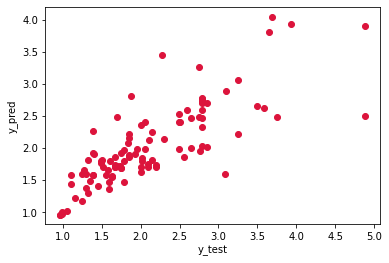

In [74]:
lower_threshold = np.percentile(y_test, 1) # 1% percentile
upper_threshold = np.percentile(y_test, 99) # 99% percentile


y_test_clipped = np.clip(y_test, lower_threshold, upper_threshold)
y_pred_clipped = np.clip(y_pred_test_xg, lower_threshold, upper_threshold)

plt.scatter(y_test_clipped, y_pred_clipped, c='crimson')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

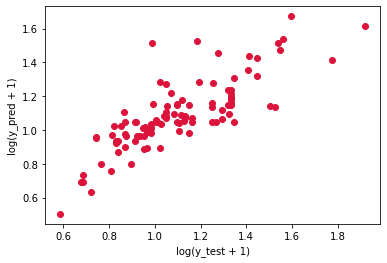

In [75]:
y_test_log = np.log1p(y_test)
y_pred_log = np.log1p(y_pred_test_lr)

plt.scatter(y_test_log, y_pred_log, c='crimson')
plt.xlabel('log(y_test + 1)')
plt.ylabel('log(y_pred + 1)')
plt.show()

In [78]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_test_lr)
print("R^2:", r2)


R^2: 0.6100037400087139
